In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [2]:
X=data.data
y=data.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(X_train,y_train)
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [3]:
y_pred=L.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.518811312453925
RMSE 48.72713760953252


In [4]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)
R.fit(X_train,y_train)
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [5]:
y_pred1=R.predict(X_test)
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.0004249020044191365
RMSE 70.25956272917782


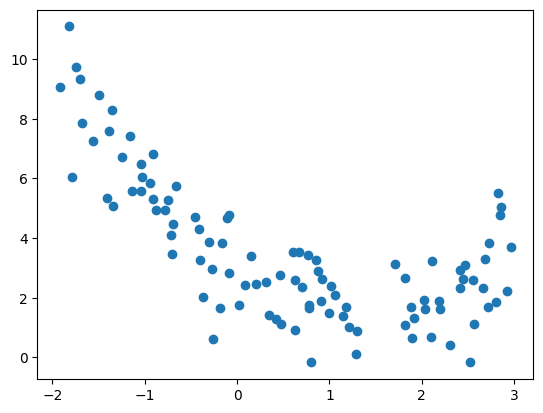

In [6]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [7]:
x1[:5]

array([[ 0.9036599 ],
       [-0.36521015],
       [-1.74697663],
       [ 0.84975871],
       [ 0.70242779]])

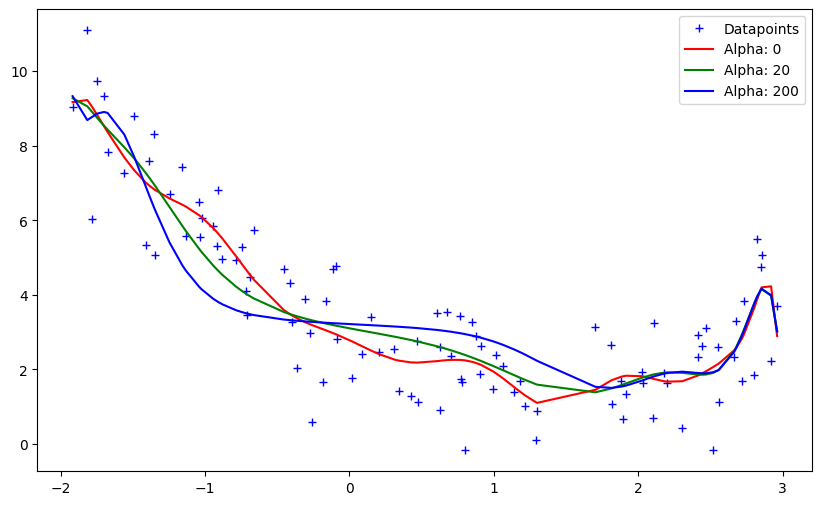

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    # Create a pipeline with two steps:
    # 1. PolynomialFeatures: Generates polynomial and interaction features up to the specified degree (16 in this case).
    # 2. Ridge: Ridge regression with the specified regularization strength (alpha).
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    
    # Fit the model to the training data (x1) and target (x2).
    model.fit(x1, x2)
    
    # Use the fitted model to make predictions on the training data (x1).
    return model.predict(x1)

# Define a list of alpha values to try in the Ridge regression.
alphas = [0, 20, 200]
# Define a list of colors to use for plotting each alpha value's predictions.
cs = ['r', 'g', 'b']

# Create a new figure for plotting with specified size.
plt.figure(figsize=(10, 6))

# Plot the original data points.
plt.plot(x1, x2, 'b+', label='Datapoints')

# Iterate over each alpha value and corresponding color.
for alpha, c in zip(alphas, cs):
    # Get the predictions for the current alpha value.
    preds = get_preds_ridge(x1, x2, alpha)
    
    # Sort the predictions and x1 values to ensure the plot is smooth and not jumbled.
    # np.argsort(x1[:, 0]) returns the indices that would sort the first column of x1.
    # preds[np.argsort(x1[:, 0])] reorders the predictions to match the sorted x1 values.
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

# Add a legend to the plot to identify each alpha value's predictions.
plt.legend()

# Display the plot.
plt.show()